In [1]:
import pandas as pd
file_path = r'C:\Users\saipr\Downloads\fi.xlsx'
df = pd.read_excel(file_path)

In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
print(df.columns)
# Assuming 'df' is your DataFrame and 'text_column' is the column with text values
label_encoder = LabelEncoder()
df['encoded_column'] = label_encoder.fit_transform(df['Object Type'])
print(df.columns)

Index(['Object Type', 'Truncation', 'Occlusion State', 'Alpha Rotation',
       'Bounding Box Coordinates', 'Dimensions', 'Location', 'Rotation_y',
       'Distance'],
      dtype='object')
Index(['Object Type', 'Truncation', 'Occlusion State', 'Alpha Rotation',
       'Bounding Box Coordinates', 'Dimensions', 'Location', 'Rotation_y',
       'Distance', 'encoded_column'],
      dtype='object')


In [2]:
print(df.columns)

Index(['Object Type', 'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2',
       'BoundingBox_Y2', 'Location_x', 'Location_y', 'Location_z',
       'Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height',
       'Rotation_y', 'Distance', 'encoded_column'],
      dtype='object')


In [8]:
import pandas as pd

def convert_location_to_xyz(df, location_col):
    """
    Convert the 'Location' column into separate columns for x, y, and z coordinates.

    Args:
    df (DataFrame): The DataFrame containing the 'Location' column.
    location_col (str): The name of the 'Location' column.

    Returns:
    DataFrame: The DataFrame with 'Location_x', 'Location_y', and 'Location_z' columns.
    """
    # Convert string representation of lists to actual lists
    df[location_col] = df[location_col].apply(eval)

    # Create separate columns for x, y, and z coordinates
    df[['Location_x', 'Location_y', 'Location_z']] = pd.DataFrame(df[location_col].tolist(), columns=['Location_x', 'Location_y', 'Location_z'])

    # Drop the original 'Location' column
    df.drop(columns=[location_col], inplace=True)

    return df

# Usage example:
df = convert_location_to_xyz(df, 'Location')


In [9]:
import pandas as pd

def convert_bounding_box_to_xy(df, bounding_box_col):
    """
    Convert the 'Bounding Box Coordinates' column into separate columns for X1, Y1, X2, and Y2 coordinates.

    Args:
    df (DataFrame): The DataFrame containing the 'Bounding Box Coordinates' column.
    bounding_box_col (str): The name of the 'Bounding Box Coordinates' column.

    Returns:
    DataFrame: The DataFrame with 'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', and 'BoundingBox_Y2' columns.
    """
    # Convert string representation of lists to actual lists
    df[bounding_box_col] = df[bounding_box_col].apply(eval)

    # Create separate columns for X1, Y1, X2, and Y2 coordinates
    df[['BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2']] = pd.DataFrame(df[bounding_box_col].tolist(), columns=['BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2'])

    # Drop the original 'Bounding Box Coordinates' column
    df.drop(columns=[bounding_box_col], inplace=True)

    return df

# Usage example:
df = convert_bounding_box_to_xy(df, 'Bounding Box Coordinates')


In [10]:
import pandas as pd

def convert_dimensions_to_xyz(df, dimensions_col):
    """
    Convert the 'Dimensions' column into separate columns for length, width, and height.

    Args:
    df (DataFrame): The DataFrame containing the 'Dimensions' column.
    dimensions_col (str): The name of the 'Dimensions' column.

    Returns:
    DataFrame: The DataFrame with 'Dimensions_Length', 'Dimensions_Width', and 'Dimensions_Height' columns.
    """
    # Convert string representation of lists to actual lists
    df[dimensions_col] = df[dimensions_col].apply(eval)

    # Create separate columns for length, width, and height
    df[['Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height']] = pd.DataFrame(df[dimensions_col].tolist(), columns=['Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height'])

    # Drop the original 'Dimensions' column
    df.drop(columns=[dimensions_col], inplace=True)

    return df

# Usage example:
df = convert_dimensions_to_xyz(df, 'Dimensions')


In [2]:
print(df.columns)

Index(['Object Type', 'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2',
       'BoundingBox_Y2', 'Location_x', 'Location_y', 'Location_z',
       'Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height',
       'Rotation_y', 'Distance', 'encoded_column'],
      dtype='object')


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


X = df[['Rotation_y', 'encoded_column', 
        'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2',
        'Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height',
        'Location_x', 'Location_y', 'Location_z']]
y = df['Distance']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture with increased complexity
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4098, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=1, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
deep_learning_mae = mean_absolute_error(y_test, y_pred)

# Print Mean Absolute Error
print(f'Deep Learning MAE: {deep_learning_mae}')


328/328 [==============================] - 1s 2ms/step
Deep Learning MAE: 8429.62854053937


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Load the DataFrame 'df' and define X and y as before

# Specify the path to the saved weights
weights_path = r"C:\saipragatheeswar\thesis phase2\object distance\model_weights200.h5"

# Initialize the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4098, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Load the saved weights
model.load_weights(weights_path)

# Continue training the model
model.fit(X_train_scaled, y_train, epochs=1, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
deep_learning_mae = mean_absolute_error(y_test, y_pred)

# Print Mean Absolute Error
print(f'Deep Learning MAE: {deep_learning_mae}')


328/328 [==============================] - 1s 1ms/step
Deep Learning MAE: 3804.0790809685823


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 4098)              53274     
                                                                 
 dense_81 (Dense)            (None, 2048)              8394752   
                                                                 
 dense_82 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_83 (Dense)            (None, 512)               524800    
                                                                 
 dense_84 (Dense)            (None, 256)               131328    
                                                                 
 dense_85 (Dense)            (None, 128)               32896     
                                                                 
 dense_86 (Dense)            (None, 64)               

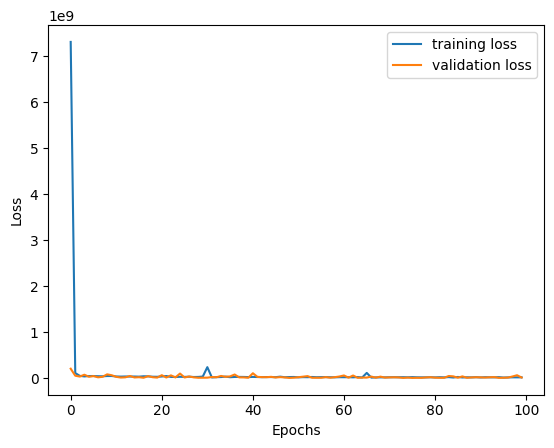

328/328 [==============================] - 1s 2ms/step


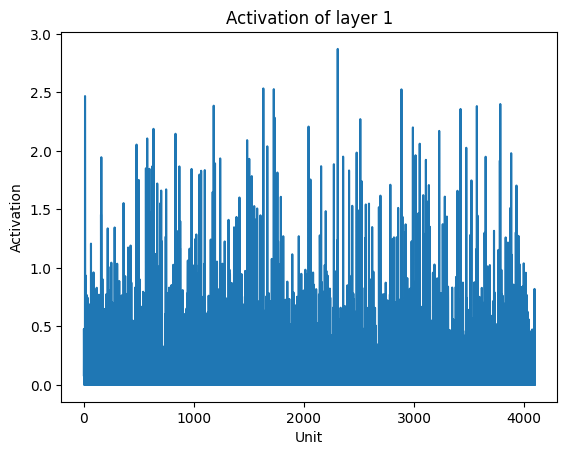

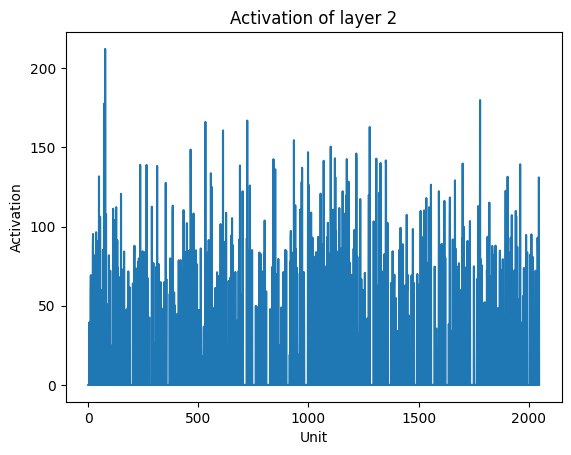

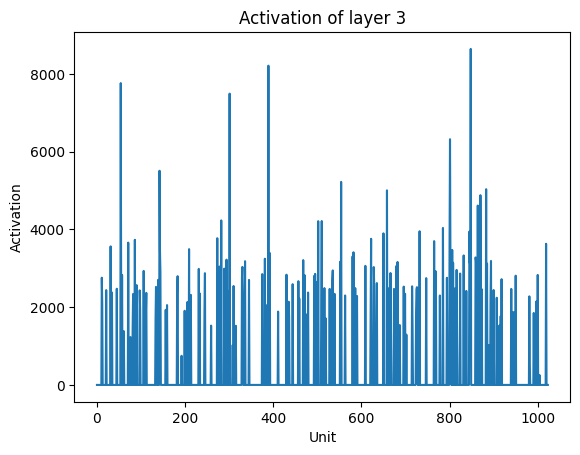

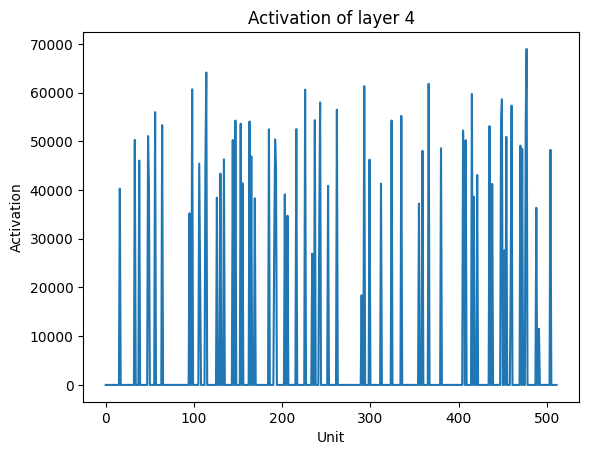

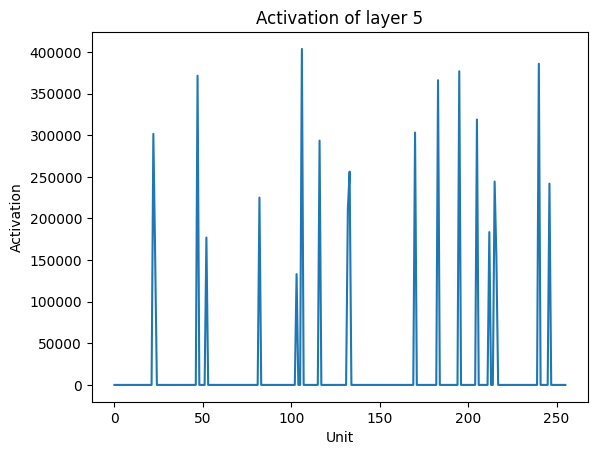

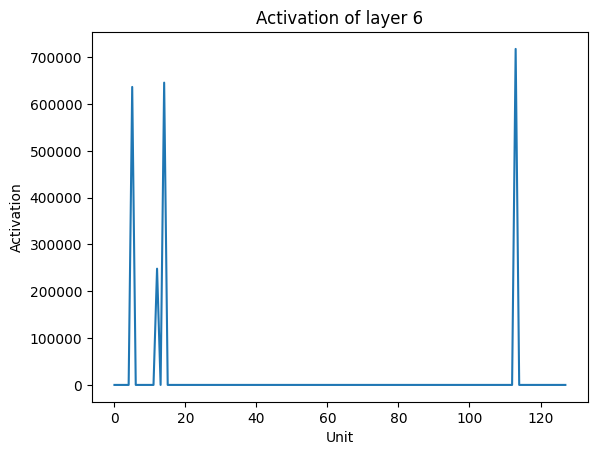

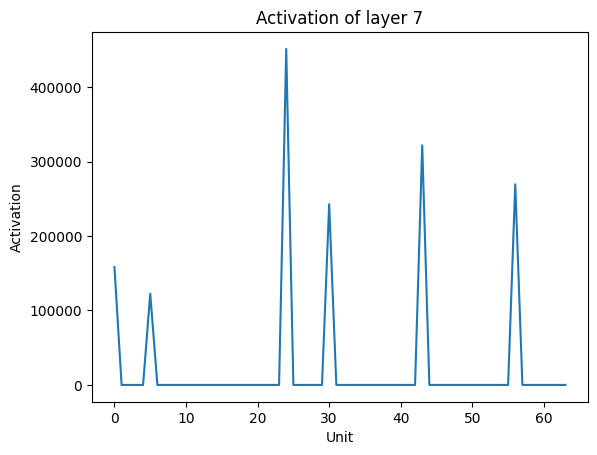

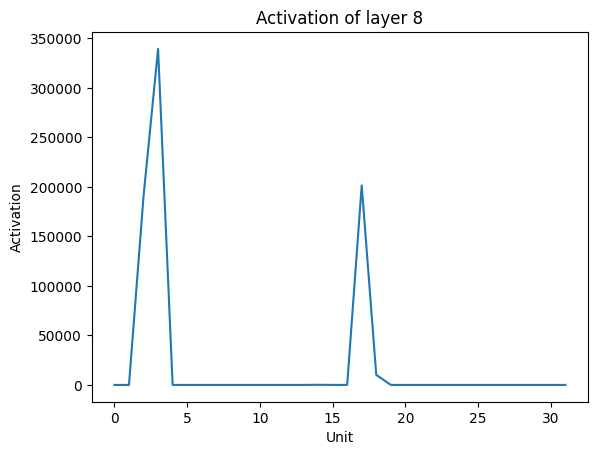

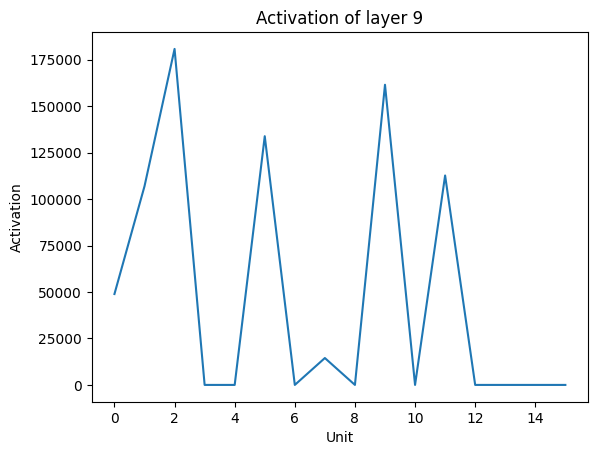

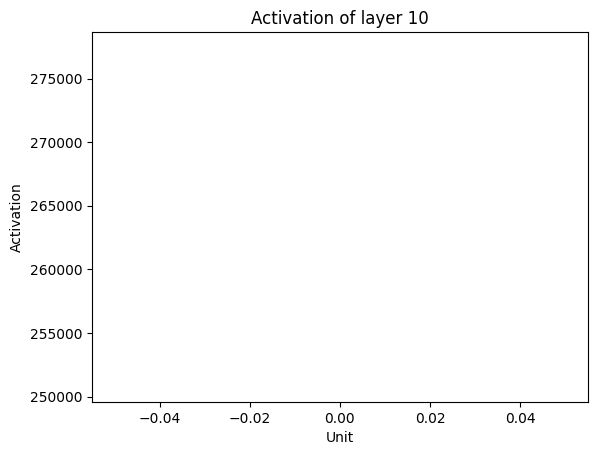

In [90]:
import matplotlib.pyplot as plt

# Model Summary
print(model.summary())

# Training History Plot
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Layer Outputs
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_test_scaled)

# Plot activations for the first test sample
for i, activation in enumerate(activations):
    plt.figure()
    plt.plot(activation[0])  # Plotting the first sample in the test set
    plt.title('Activation of layer {}'.format(i+1))
    plt.xlabel('Unit')
    plt.ylabel('Activation')
    plt.show()


In [83]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


X = df[['Rotation_y', 'encoded_column', 
        'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2',
        'Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height',
        'Location_x', 'Location_y', 'Location_z']]
y = df['Distance']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture with increased complexity
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4098, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
deep_learning_mae = mean_absolute_error(y_test, y_pred)

# Print Mean Absolute Error
print(f'Deep Learning MAE: {deep_learning_mae}')


Epoch 1/10
1310/1310 [==============================] - 10s 7ms/step - loss: 5518823936.0000
Epoch 2/10
1310/1310 [==============================] - 9s 7ms/step - loss: 1015483264.0000
Epoch 3/10
1310/1310 [==============================] - 10s 8ms/step - loss: 861173504.0000
Epoch 4/10
1310/1310 [==============================] - 10s 7ms/step - loss: 924809600.0000
Epoch 5/10
1310/1310 [==============================] - 10s 8ms/step - loss: 635675776.0000
Epoch 6/10
1310/1310 [==============================] - 10s 8ms/step - loss: 555720256.0000
Epoch 7/10
1310/1310 [==============================] - 10s 7ms/step - loss: 347768096.0000
Epoch 8/10
1310/1310 [==============================] - 9s 7ms/step - loss: 321736320.0000
Epoch 9/10
1310/1310 [==============================] - 9s 7ms/step - loss: 131807000.0000
Epoch 10/10
328/328 [==============================] - 1s 2ms/step
Deep Learning MAE: 3556.232328837077


In [84]:
print(y_pred)
print(y_test)

[[263130.2  ]
 [ 41746.664]
 [474057.47 ]
 ...
 [553325.06 ]
 [207817.64 ]
 [692624.9  ]]
31454    265135.563289
462         350.000000
43222    474705.796255
42352    507852.351957
17170    340761.299315
             ...      
6592     438866.501658
21051    256742.037227
5303     557005.168728
34398    204512.520295
33023    692103.651765
Name: Distance, Length: 10475, dtype: float64


In [89]:
import matplotlib.pyplot as plt
# Scatter plot function for actual vs. predicted distances, filtering for values less than 100
def plot_actual_vs_predicted_less_than_100(actual, predicted):
    # Filter data for distances less than 100
    mask = (actual < 10000) & (predicted < 10000)
    actual_filtered = actual[mask]
    predicted_filtered = predicted[mask]

    plt.figure(figsize=(8, 6))
    plt.scatter(actual_filtered, predicted_filtered, color='blue', alpha=0.5)
    plt.title(f'Actual vs. Predicted Distance')
    plt.xlabel('Actual Distance')
    plt.ylabel('Predicted Distance')
    plt.show()

plot_actual_vs_predicted_less_than_100(y_test, y_pred)

ValueError: cannot reshape array of size 109725625 into shape (10475,)

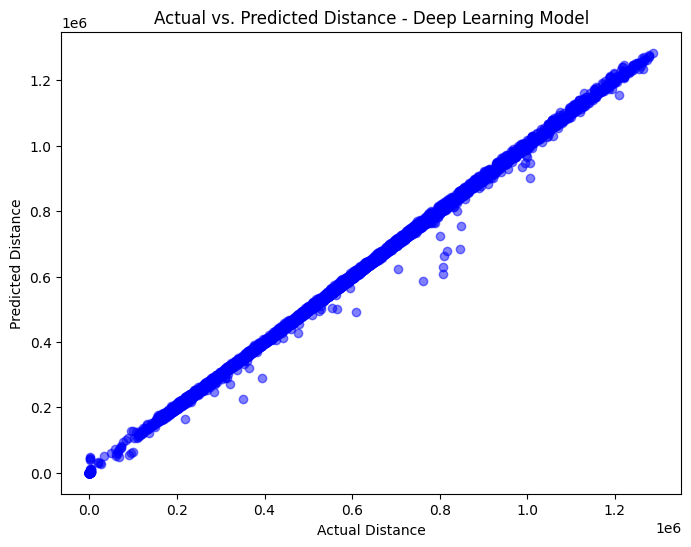

In [85]:
import matplotlib.pyplot as plt

# Scatter plot function for actual vs. predicted distances
def plot_actual_vs_predicted_deep_learning(actual, predicted):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, color='blue', alpha=0.5)
    plt.title('Actual vs. Predicted Distance - Deep Learning Model')
    plt.xlabel('Actual Distance')
    plt.ylabel('Predicted Distance')
    plt.show()

# Plot for Deep Learning Model
plot_actual_vs_predicted_deep_learning(y_test, y_pred)


In [87]:
df.columns()

TypeError: 'Index' object is not callable

In [7]:
# Specify the path where you want to save the weights
weights_path = r"C:\saipragatheeswar\thesis phase2\object distance\model_weights200.h5"

# Save the model weights
model.save_weights(weights_path)

print("Model weights have been saved successfully.")


NameError: name 'X_train_scaled' is not defined

In [ ]:
import pandas as pd

df = pd.read_excel(r"C:\Users\saipr\Downloads\backward.xlsx")



if not df.empty:
    for index, row in df.iterrows():
        # Extract the input data from the row
        new_input = row[['Rotation_y', 'encoded_column', 
                         'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2',
                         'Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height',
                         'Location_x', 'Location_y', 'Location_z']]

        # Standardize the input using the same scaler used for training data
        new_input_scaled = scaler.transform([new_input])

        # Predict the output using the trained model
        predicted_output = model.predict(new_input_scaled)

        print("Input for row {}: {}".format(index, new_input.values))
        print("Predicted output for row {}: {}".format(index, predicted_output))
else:
    print("No rows found where 'Object Type' is 'cup' and 'Distance' is 200.")


In [377]:
# Randomly sample one row from the DataFrame
random_row = df.sample(n=1, random_state=42)
print(random_row)
# Extract the input data from the sampled row
new_input = random_row[['Rotation_y', 'encoded_column', 
                        'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2',
                        'Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height',
                        'Location_x', 'Location_y', 'Location_z']]

# Standardize the input using the same scaler used for training data
new_input_scaled = scaler.transform(new_input)

# Predict the output using the trained model
predicted_output = model.predict(new_input_scaled)

print("Randomly sampled input:", new_input.values)
print("Predicted output:", predicted_output)


      Object Type  BoundingBox_X1  BoundingBox_Y1  BoundingBox_X2  \
31454         Car          174.34          189.92           291.1   

       BoundingBox_Y2  Location_x  Location_y  Location_z  Dimensions_Length  \
31454          236.29       -13.9        2.17       26.87                1.5   

       Dimensions_Width  Dimensions_Height  Rotation_y       Distance  \
31454              1.95                4.6        1.57  265135.563289   

       encoded_column  
31454               0  
1/1 [==============================] - 0s 26ms/step


Randomly sampled input: [[  1.57   0.   174.34 189.92 291.1  236.29   1.5    1.95   4.6  -13.9
    2.17  26.87]]
Predicted output: [[264848.1]]


In [9]:
# Define your input data
new_input = np.array([[-0.01781374, 10, 275, 246, 1466, 1058, 0.004568265, -0.054317664, -0.459166974, 0.286192536, 0.614928007, 0.11661499]])

# Standardize the input using the same scaler used for training data
new_input_scaled = scaler.transform(new_input)

# Predict the output using the trained model
predicted_output = model.predict(new_input_scaled)

print("Predicted output:", predicted_output)


1/1 [==============================] - 0s 34ms/step
Predicted output: [[1.1840513]]


c:\Users\saipr\anaconda3\envs\newenvcuda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False